<h1>Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.</h1>

<h2>Практическое задание</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

**1.** Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

<b>Стаж (2 столбец), цена занятия (3 столбец) и квалификация (3 столбец).</b>

In [2]:
X = np.array([
    [   1,    1,  500,    1],
    [   1,    1,  700,    1],
    [   1,    2,  750,    2],
    [   1,    5,  600,    1],
    [   1,    3, 1450,    2],
    [   1,    0,  800,    1],
    [   1,    5, 1500,    3],
    [   1,   10, 2000,    3],
    [   1,    1,  450,    1],
    [   1,    2, 1000,    2]
])

<b>Целевая переменная (средний балл ЕГЭ)</b>

In [3]:
y = np.array([45, 55, 50, 55, 60, 35, 75, 80, 50, 60])

<b>Стандартизация вектора X</b>

In [4]:
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

<b>MSE</b>

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [6]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

<b>Расчет модели методом градиентного спуска с использованием L2 регуляризации</b>

In [7]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    # начальные весовые коэффициенты
    W = np.random.randn(X.shape[1])

    # размер выборки
    n = X.shape[0]

    # шаг градиентного спуска
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        # градиент функции ошибки
        dQ = 2/n * X.T @ (y_pred - y)

        # градиент регуляризации
        dReg = reg * W

        W -= eta * dQ + dReg

#         if i % (iterations / 10) == 0:
#             print(f'Iter: {i}, weights: {W}, error {err}')
#
#    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [8]:
W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

In [9]:
lambda_array = np.logspace(-10, 0, 100)
lambda_array

array([1.00000000e-10, 1.26185688e-10, 1.59228279e-10, 2.00923300e-10,
       2.53536449e-10, 3.19926714e-10, 4.03701726e-10, 5.09413801e-10,
       6.42807312e-10, 8.11130831e-10, 1.02353102e-09, 1.29154967e-09,
       1.62975083e-09, 2.05651231e-09, 2.59502421e-09, 3.27454916e-09,
       4.13201240e-09, 5.21400829e-09, 6.57933225e-09, 8.30217568e-09,
       1.04761575e-08, 1.32194115e-08, 1.66810054e-08, 2.10490414e-08,
       2.65608778e-08, 3.35160265e-08, 4.22924287e-08, 5.33669923e-08,
       6.73415066e-08, 8.49753436e-08, 1.07226722e-07, 1.35304777e-07,
       1.70735265e-07, 2.15443469e-07, 2.71858824e-07, 3.43046929e-07,
       4.32876128e-07, 5.46227722e-07, 6.89261210e-07, 8.69749003e-07,
       1.09749877e-06, 1.38488637e-06, 1.74752840e-06, 2.20513074e-06,
       2.78255940e-06, 3.51119173e-06, 4.43062146e-06, 5.59081018e-06,
       7.05480231e-06, 8.90215085e-06, 1.12332403e-05, 1.41747416e-05,
       1.78864953e-05, 2.25701972e-05, 2.84803587e-05, 3.59381366e-05,
      

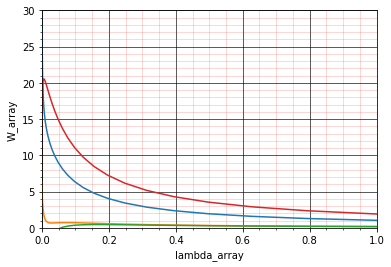

In [10]:
W_array = []

for lambda_ in lambda_array:
    W_temp = gradient_descent_reg_l2(X_st, y, iterations=7500, eta=1e-2, reg=lambda_)
    W_array.append(W_temp)

W_array = np.array(W_array)

for i in range(len(W_array[0])):
    plt.plot(lambda_array, W_array[:, i])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 35
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('lambda_array')
plt.ylabel('W_array')
plt.ylim(0, 30)
plt.xlim(0, 1)
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.8)
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.show()

**2.** Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [11]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y)
        # производная от модуля - sign
        dReg = reg * np.sign(W)
        #
        W -= eta * dQ + dReg
    return W

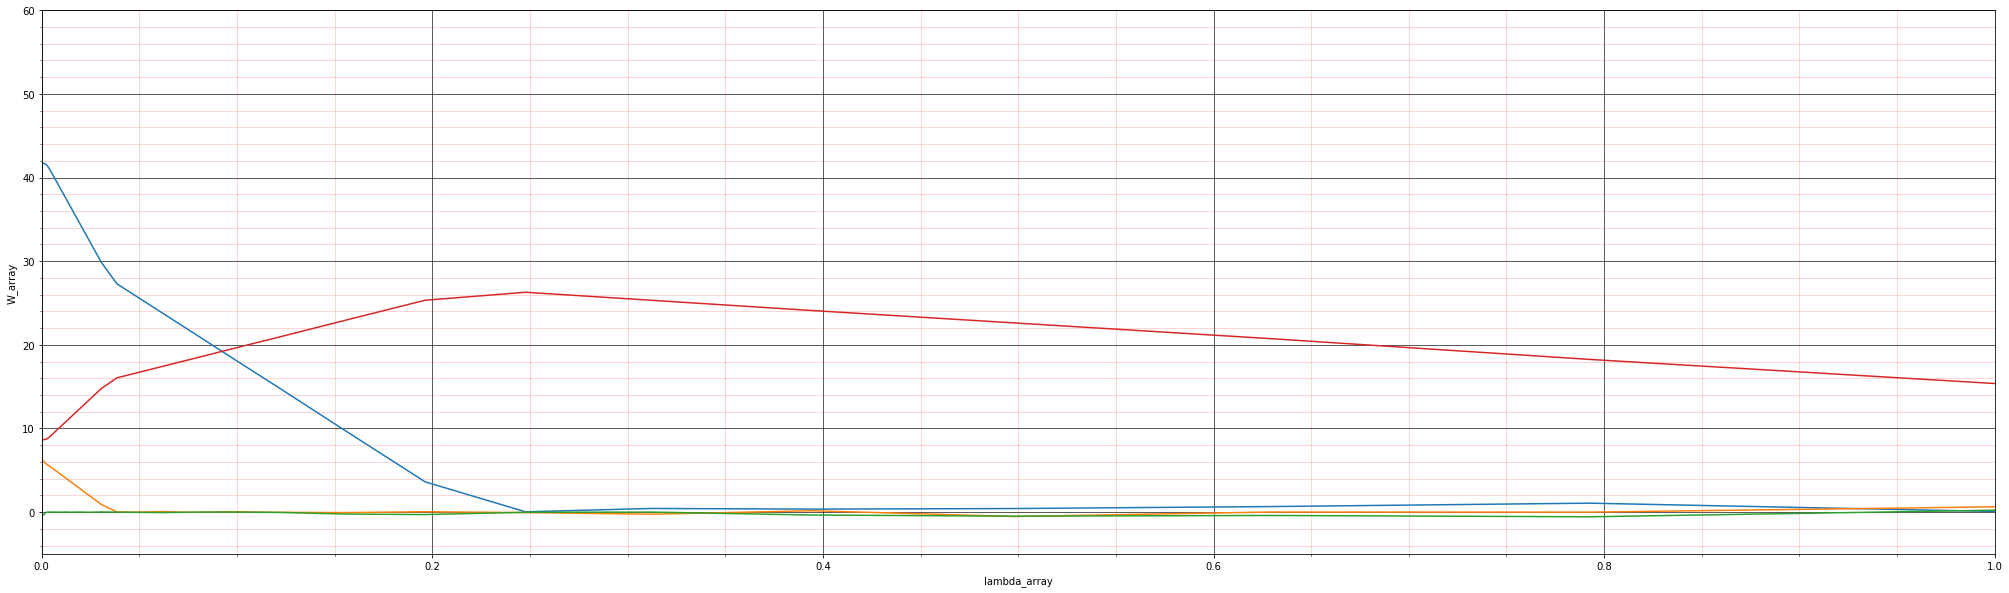

In [12]:
W = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)
lambda_array = np.logspace(-10, 0, 100)
W_array = []

for lambda_ in lambda_array:
    W_temp = gradient_descent_reg_l1(X_st, y, iterations=7500, eta=1e-2, reg=lambda_)
    W_array.append(W_temp)

W_array = np.array(W_array)

for i in range(len(W_array[0])):
    plt.plot(lambda_array, W_array[:, i])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 35
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('lambda_array')
plt.ylabel('W_array')
plt.ylim(-5, 60)
plt.xlim(0, 1)
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.8)
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.show()

**3.** *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Да, можно последовательно применить нормализацию и стандартизацию, или наоборот.

**4.** *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [13]:
X, y, coef = make_regression(
    n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
    noise=5, coef=True, random_state=2
)

display(X, y, coef)

array([[ 0.37879447, -0.61837549],
       [-0.65293115, -1.06706712],
       [-1.06581629, -0.34682333],
       ...,
       [ 1.19451016,  1.00147133],
       [ 0.1256231 ,  0.35261274],
       [-0.05674652,  0.41214611]])

array([-2.61123036e+01, -1.22254125e+02, -9.33701155e+01,  2.23698676e+01,
       -1.19353069e+00,  7.55093913e+01,  4.17391914e+00,  3.37850492e+01,
       -4.13327830e+01, -1.71060319e+00,  6.91533479e+01, -3.84944494e+01,
       -1.40841311e+01, -7.87094871e+00,  2.24655412e+01,  3.52449558e+01,
        3.54202311e+01,  4.54019343e+01,  3.93612257e+01,  1.13645719e-01,
       -1.23294801e+01,  1.18940297e+02,  2.90747757e+02,  1.07353713e+01,
        1.33621709e+02, -8.58105655e+01, -1.19323461e+01,  5.66776267e+01,
        1.45867826e+02, -2.72626165e+02, -3.86689973e+00,  4.64700598e+01,
        1.34844522e+02,  1.01167107e+01,  1.02407708e+01,  1.50555004e+01,
        6.05940840e+01, -1.46615087e-01, -1.04571676e+02, -1.09697817e+02,
        1.21274981e+01,  9.99648515e+01,  8.47610760e+01, -1.05265489e+02,
        1.35034101e+02, -3.24978496e+02,  6.56243085e+01, -4.80030943e+01,
        8.43343786e+01,  3.38914896e+00,  2.65015621e+01,  6.26227854e+01,
       -1.45046490e+02,  

array([62.6735955, 68.0472182])

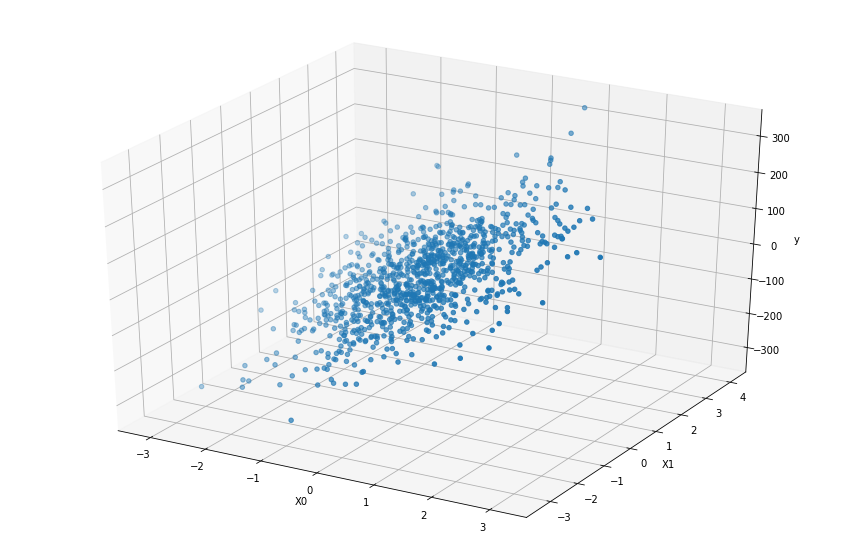

In [14]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('y')
plt.show()

In [15]:
# Получим средние значения и стандартное отклонение по столбцам
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j])/stds[j]

In [16]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [17]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0])
    
    new_w = w - 2 * eta * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(X, new_w, y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 248.3494


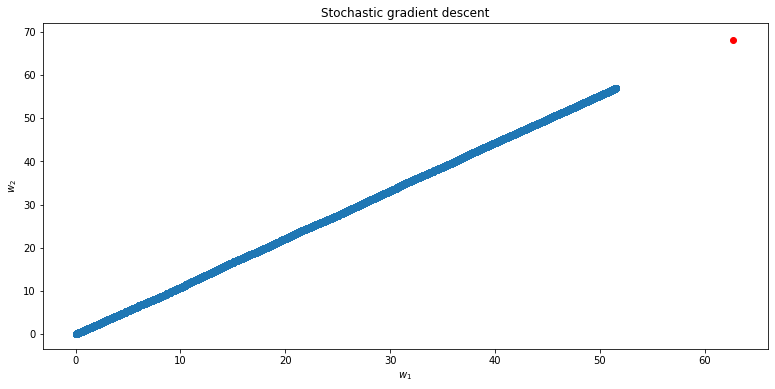

In [18]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

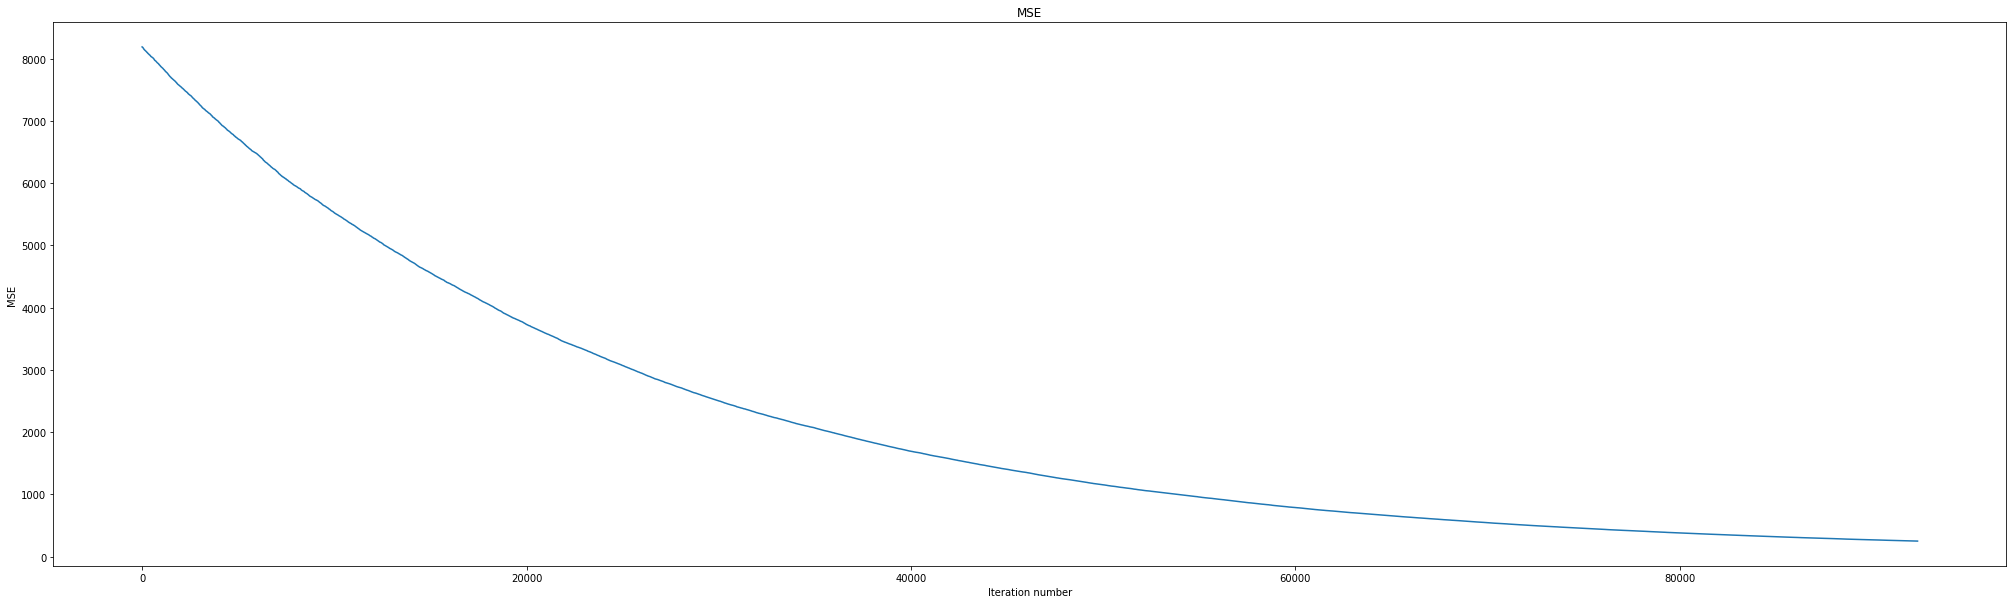

In [19]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

In [24]:
%%time
# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list_s = [w.copy()]

# список значений ошибок после каждой итерации
errors_s = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    new_w = w - eta * 2 / y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - y[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)

    error = mserror(X, new_w, y)
    
    w_list_s.append(new_w.copy())
    errors_s.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w
    
w_list_s = np.array(w_list_s)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors_s[-1], 4)}')

Iteration #0: W_new = [-0.8770491   1.16866253], MSE = 8143.11
Iteration #100: W_new = [57.29306457 59.90767571], MSE = 114.36
Iteration #200: W_new = [61.09511797 65.77858669], MSE = 42.21
Iteration #300: W_new = [61.22020165 66.88497513], MSE = 39.22
Iteration #400: W_new = [60.81127707 67.86690624], MSE = 39.01
Iteration #500: W_new = [63.01727104 68.87449656], MSE = 42.44
Iteration #600: W_new = [61.62004236 68.5922277 ], MSE = 39.45
Iteration #700: W_new = [61.34086506 68.62524345], MSE = 39.5
Iteration #800: W_new = [62.20610311 67.60795163], MSE = 39.17
Iteration #900: W_new = [62.40866111 67.70560306], MSE = 39.51
Iter 1000: error - 38.8485605603566, weights: [61.32996117 68.18159256]
В случае использования стохастического градиентного спуска ошибка составляет 38.8486
CPU times: user 235 ms, sys: 9.77 ms, total: 244 ms
Wall time: 246 ms


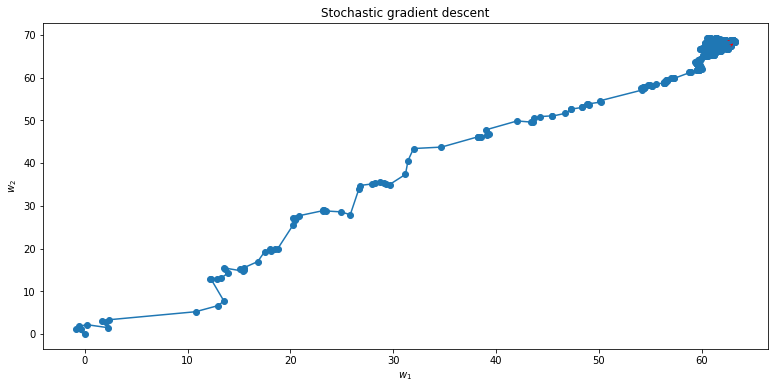

In [21]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_s[:, 0], w_list_s[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list_s[:, 0], w_list_s[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

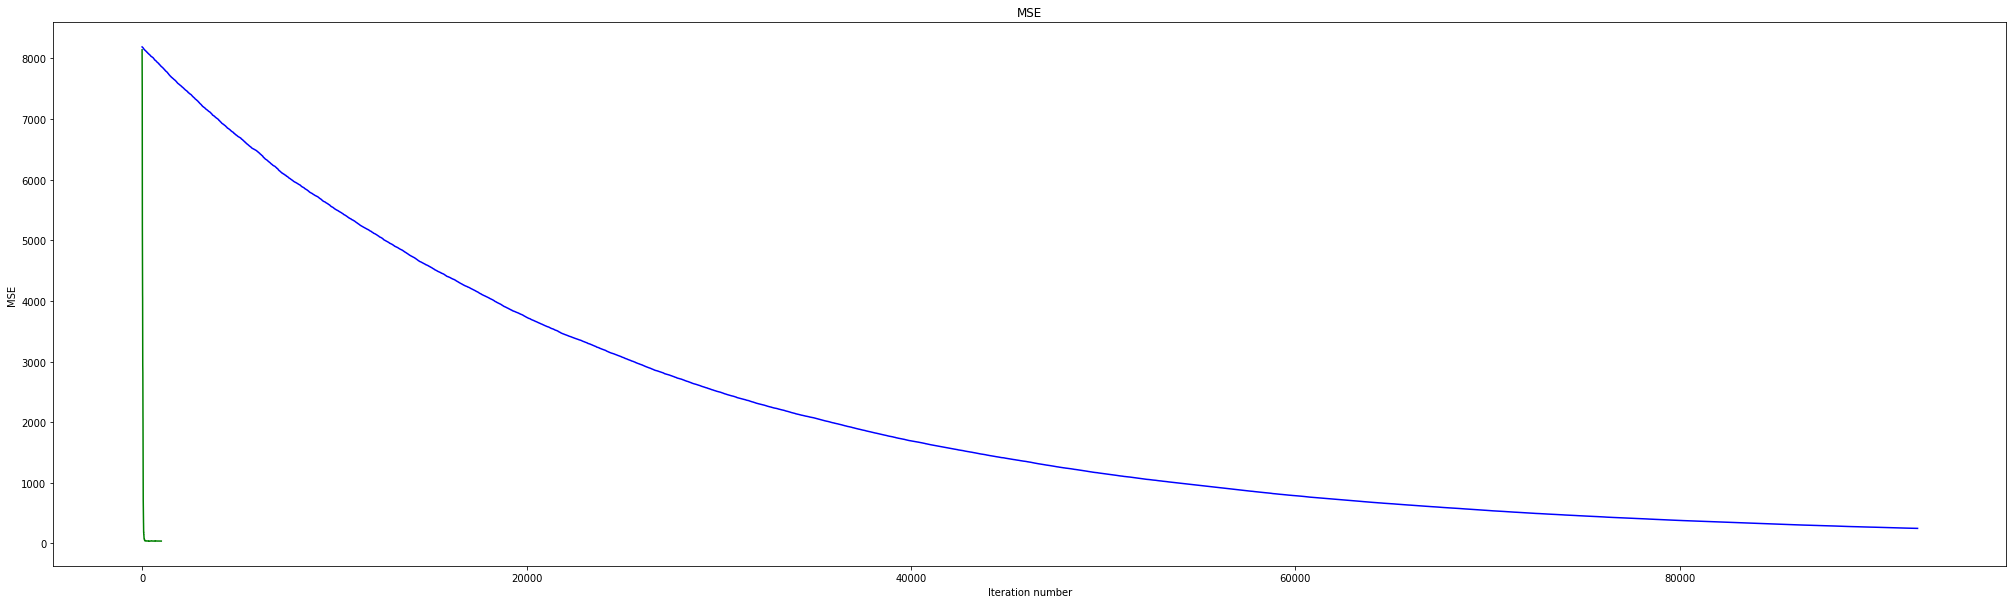

In [22]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_s)), errors_s, c='g')
plt.plot(range(len(errors)), errors, c='b')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

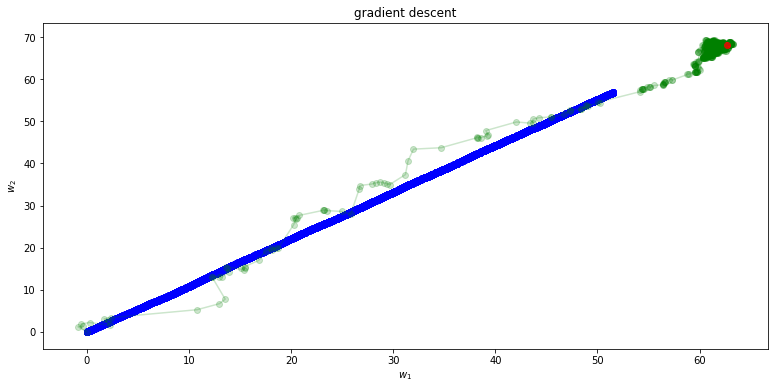

In [23]:
plt.figure(figsize=(13, 6))
plt.title('gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1], c='b', alpha=0.2)
plt.plot(w_list[:, 0], w_list[:, 1], c='b', alpha=0.2)

plt.scatter(w_list_s[:, 0], w_list_s[:, 1], c='g', alpha=0.2)
plt.plot(w_list_s[:, 0], w_list_s[:, 1], c='g', alpha=0.2)

plt.scatter(coef[0], coef[1], c='r', alpha=1)
plt.show()